### Name
### StudentId

# Librarires

In [1]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as KMEANS
from sklearn.metrics import silhouette_score

# Load Dataset

In [3]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]
standard = StandardScaler()
x_data = standard.fit_transform(x_data)

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [5]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.data = None
        self.labels = None

    def _initialize_centroids(self):
        # Using K-means++ initialization for centroids
        self.centroids = [self.data[np.random.choice(len(self.data))]]
        for _ in range(1, self.n_clusters):
            distances = np.array([min([np.linalg.norm(x - c) ** 2 for c in self.centroids]) for x in self.data])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    self.centroids.append(self.data[j])
                    break

    def _assign_clusters(self):
        clusters = [[] for _ in range(self.n_clusters)]
        for x in self.data:
            closest_centroid_idx = np.argmin([np.linalg.norm(x - c) for c in self.centroids])
            clusters[closest_centroid_idx].append(x)
        return clusters

    def _update_centroids(self, clusters):
        new_centroids = [np.mean(cluster, axis=0) if len(cluster) > 0 else self.centroids[idx]
                         for idx, cluster in enumerate(clusters)]
        return new_centroids

    def train(self, X):
        self.data = np.array(X)
        self._initialize_centroids()
        for _ in range(self.max_iter):
            clusters = self._assign_clusters()
            new_centroids = self._update_centroids(clusters)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        self.labels = self._assign_labels()
        return self

    def fit(self, X, iter=5):
        best_centroids, best_labels, min_cost = None, None, float('inf')
        for _ in range(iter):
            self.train(X)
            current_cost = self._compute_cost()
            if current_cost < min_cost:
                best_centroids = self.centroids
                best_labels = self.labels
                min_cost = current_cost
        self.centroids, self.labels = best_centroids, best_labels
        return self

    def _assign_labels(self):
        return [np.argmin([np.linalg.norm(x - c) for c in self.centroids]) for x in self.data]

    def _compute_cost(self):
        return sum([min([np.linalg.norm(x - c) ** 2 for c in self.centroids]) for x in self.data])

    def score(self):
        total_score = 0
        clusters = [[] for _ in range(self.n_clusters)]
        for idx, x in enumerate(self.data):
            clusters[self.labels[idx]].append(x)
        for idx, x in enumerate(self.data):
            intra_cluster_distances = [np.linalg.norm(x - y) for y in clusters[self.labels[idx]] if not np.array_equal(x, y)]
            a = np.mean(intra_cluster_distances) if intra_cluster_distances else 0
            inter_cluster_distances = [np.mean([np.linalg.norm(x - y) for y in clusters[j]]) for j in range(self.n_clusters) if j != self.labels[idx]]
            b = min(inter_cluster_distances) if inter_cluster_distances else 0
            total_score += (b - a) / max(a, b) if max(a, b) != 0 else 0
        return total_score / len(self.data)


# Use elbow method and silhouette method to choose optimal cluster numbers

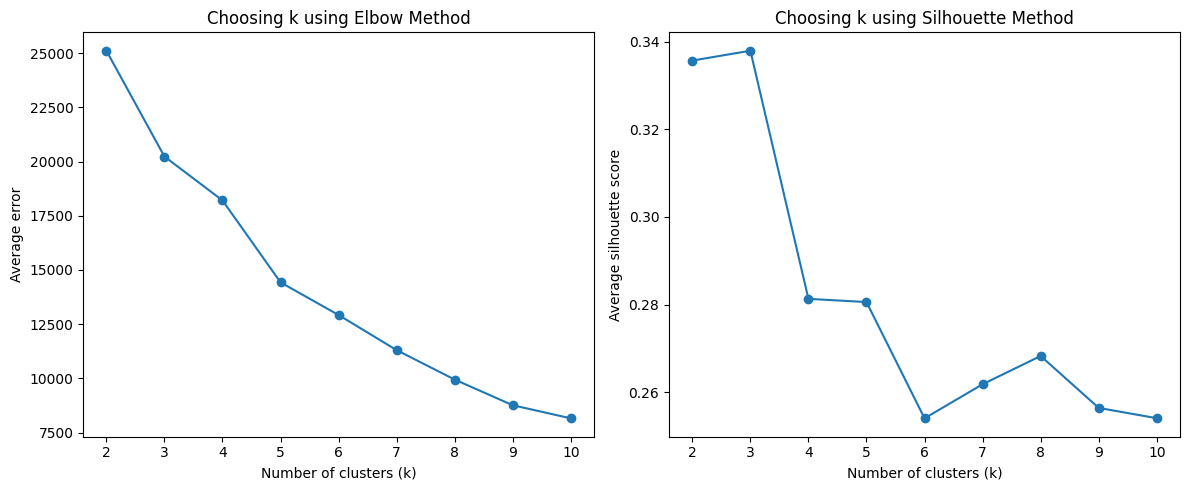

In [8]:
import matplotlib.pyplot as plt

def choose_optimal_clusters(x_data, k_range=(2, 11)):
    errors = []
    scores = []

    for k in range(k_range[0], k_range[1]):
        kmeans = KMeans(n_clusters=k).fit(x_data)
        errors.append(kmeans._compute_cost())
        scores.append(kmeans.score())

    plt.figure(figsize=(12, 5))

    # Elbow Method
    plt.subplot(1, 2, 1)
    plt.plot(range(k_range[0], k_range[1]), errors, marker='o')
    plt.title('Choosing k using Elbow Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Average error')

    # Silhouette Method
    plt.subplot(1, 2, 2)
    plt.plot(range(k_range[0], k_range[1]), scores, marker='o')
    plt.title('Choosing k using Silhouette Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Average silhouette score')

    plt.tight_layout()
    plt.show()

choose_optimal_clusters(x_data, (2, 11))

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

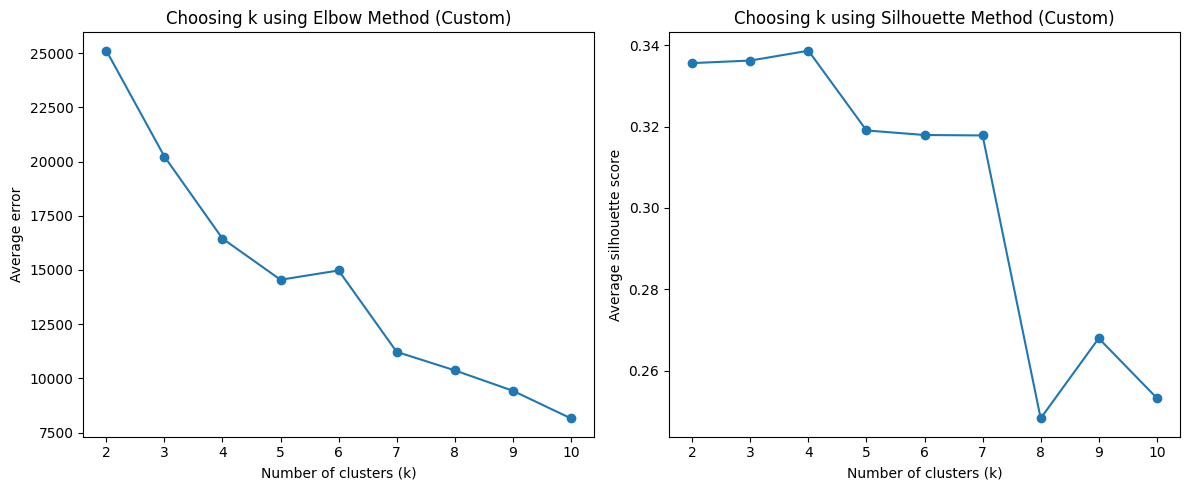

NameError: name 'SKMeans' is not defined

In [9]:
custom_errors = []
custom_scores = []

for k in range(2, 11):
    custom_kmeans = KMeans(n_clusters=k).fit(x_data)
    custom_errors.append(custom_kmeans._compute_cost())
    custom_scores.append(custom_kmeans.score())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), custom_errors, marker='o', label='Custom KMeans')
plt.title('Choosing k using Elbow Method (Custom)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average error')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), custom_scores, marker='o', label='Custom KMeans')
plt.title('Choosing k using Silhouette Method (Custom)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

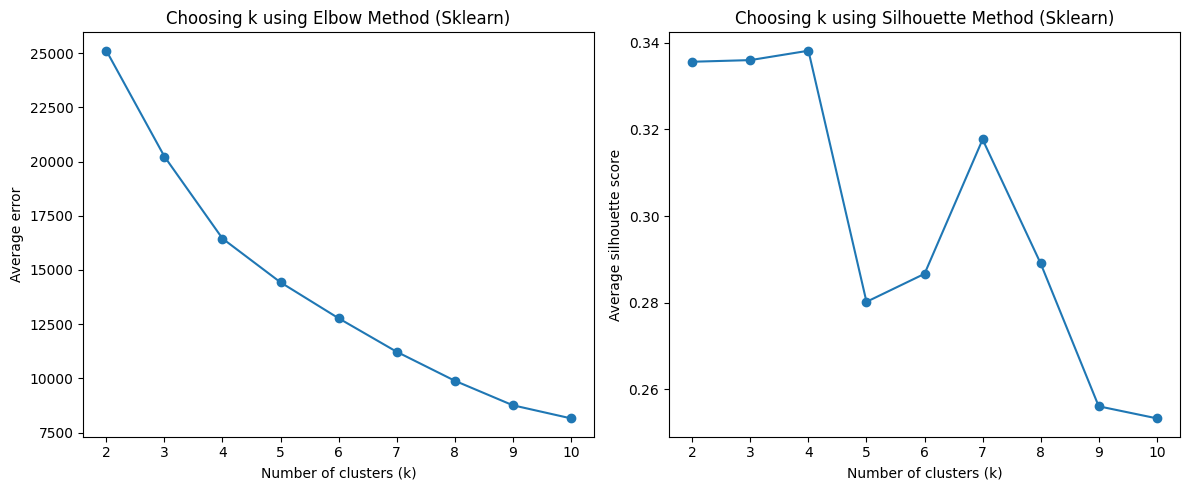

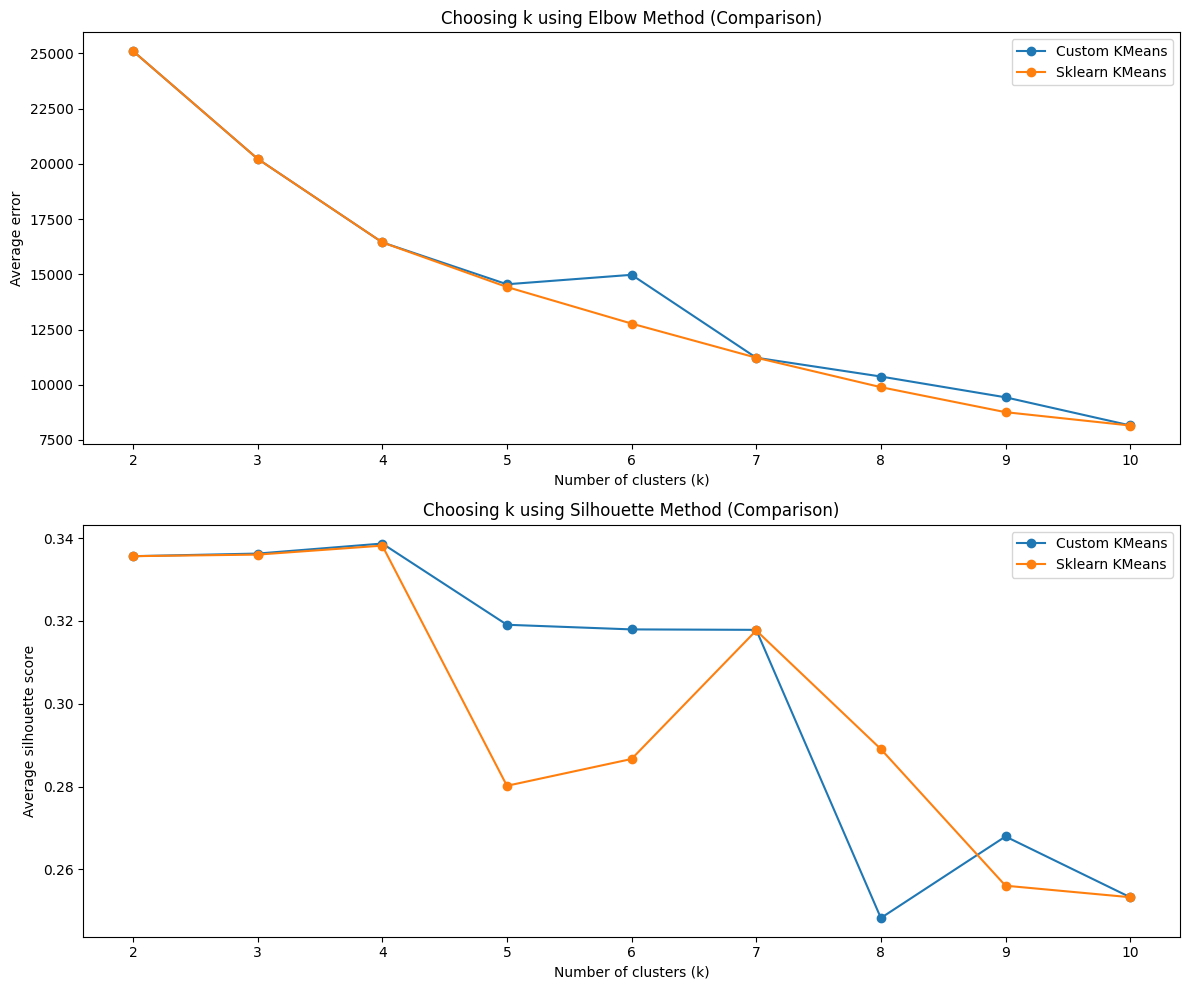

In [10]:
from sklearn.cluster import KMeans as SKMeans
from sklearn.metrics import silhouette_score
sk_errors = []
sk_scores = []

for k in range(2, 11):
    sk_model = SKMeans(n_clusters=k, random_state=42)
    sk_model.fit(x_data)
    sk_errors.append(sk_model.inertia_)
    sk_scores.append(silhouette_score(x_data, sk_model.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sk_errors, marker='o', label='Sklearn KMeans')
plt.title('Choosing k using Elbow Method (Sklearn)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average error')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sk_scores, marker='o', label='Sklearn KMeans')
plt.title('Choosing k using Silhouette Method (Sklearn)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(range(2, 11), custom_errors, marker='o', label='Custom KMeans')
plt.plot(range(2, 11), sk_errors, marker='o', label='Sklearn KMeans')
plt.title('Choosing k using Elbow Method (Comparison)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average error')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(range(2, 11), custom_scores, marker='o', label='Custom KMeans')
plt.plot(range(2, 11), sk_scores, marker='o', label='Sklearn KMeans')
plt.title('Choosing k using Silhouette Method (Comparison)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.legend()

plt.tight_layout()
plt.show()

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

The custom KMeans algorithm finds
𝑘
=
5 as optimal due to its particular way of initializing centroids and possibly different convergence behavior. In contrast, sklearn's KMeans finds
𝑘
=
4 optimal due to its robust optimizations and handling of initializations. The elbow method results being almost identical suggests that both algorithms agree on the general structure of the data, but the precise definitions of the clusters differ slightly due to implementation differences.

### would you prefer elbow method for determining optimal cluster number or silhouette method?

While the elbow method is useful for its simplicity and quick visual inspection, the silhouette method is generally preferred for its comprehensive and objective evaluation of cluster quality. Therefore, in most cases, especially when dealing with complex or large datasets, the silhouette method would be the preferred choice for determining the optimal number of clusters.